In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Bootstrap

### Recap

In [28]:
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop= sf_pop.where("Total Compensation",are.above(10*40*52))
sf_pop.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [29]:
sf_pop.num_rows

35050

Population Median =  112965.15


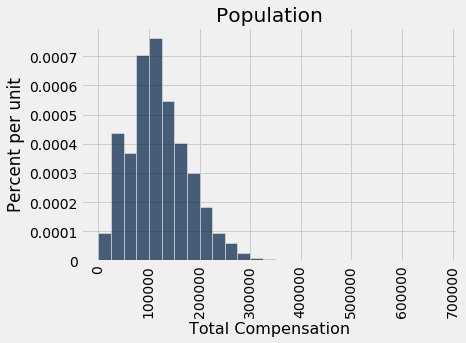

In [30]:
pop_median = percentile(50, sf_pop.column('Total Compensation'))
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median =  112965.15
Sample Median =  111781.7


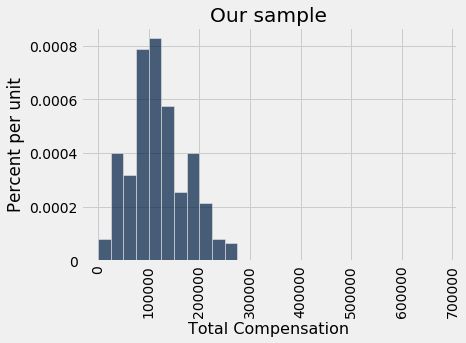

In [31]:
# Random sample of size 300
our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)
plots.title('Our sample');

In [24]:
# Empirical distribution of the sample median
# assuming we can just resample from the population
def one_sample_median():
    single_sample = sf_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('Total Compensation'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)
medians

array([110975.3 , 109104.58, 109436.02, 115358.46, 109532.71, 105959.55,
       107163.65, 106867.84, 102475.25, 107531.34, 108841.77, 104674.16,
       108673.9 , 101390.99, 103621.8 , 101094.95, 108545.21, 103825.46,
       104286.  , 113611.89, 100883.2 , 115852.25, 107943.18, 110407.28,
       103569.12, 113070.09, 105498.24, 108427.59, 110062.97, 110064.62,
       110216.6 , 111098.67, 109506.29, 106333.89, 102916.68, 108846.28,
       110617.67,  98424.91, 112656.71, 105935.65, 109488.37, 112120.59,
       103797.92, 104095.64, 104990.65, 111270.95, 111734.92, 108267.25,
       106081.05, 103924.04, 114524.46, 105033.52, 105533.29, 103582.71,
       110673.04, 106733.82, 107333.97, 104549.44, 104628.43, 106802.01,
       108905.22, 102804.05, 103383.39, 100787.68, 111881.63, 105545.3 ,
       103505.18, 112425.24, 105541.52, 105531.75,  98252.64,  99168.08,
       113664.73, 114627.51, 105490.28, 112653.91, 105163.53, 101219.61,
       105476.47, 104226.84,  99877.26, 107443.66, 

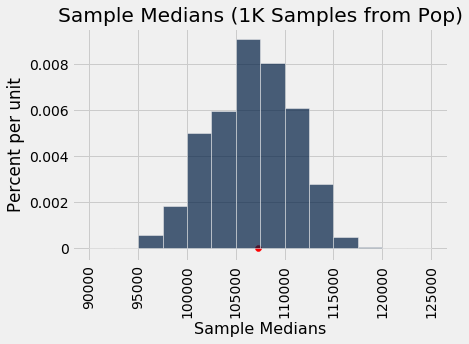

In [25]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        112965.15
Our Sample Median =        111781.7
Bootstrap Sample Median =  107001.12


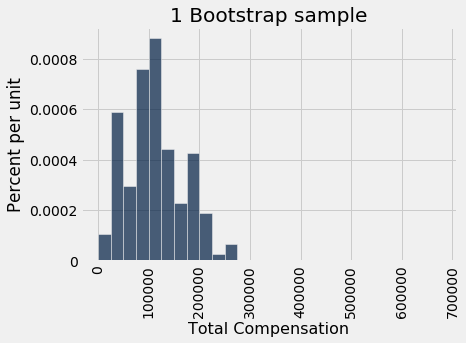

In [46]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [56]:
def one_bootstrap_median():
    single_sample = our_sample.sample(10)
    return percentile(50, single_sample.column('Total Compensation'))

In [57]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)
bootstrap_medians

array([129785.7 , 111091.06, 122716.11, 124521.82,  88076.3 ,  90176.57,
        70345.37,  88076.3 , 120577.83,  89521.15,  89387.65, 138172.21,
       116917.94,  99477.4 , 123017.44, 114354.45,  92760.46, 105567.7 ,
       115774.49, 111091.06, 163916.77,  99396.89,  87350.66,  98713.06,
       101992.04,  89748.95,  99914.19, 107696.57, 100756.51,  79716.61,
       124521.82,  87010.21, 103408.53, 115822.29, 110714.26, 107652.71,
        86927.21, 115822.29,  99477.4 ,  94929.  , 110848.37, 108273.36,
        90176.57, 105567.7 ,  89351.28,  75104.47,  96545.18, 133972.82,
       105651.47, 116917.94,  82798.81,  89748.95, 103068.02, 106936.54,
        89351.28, 116917.94, 115828.5 ,  95368.47, 114365.75, 105241.01,
       105241.01, 119482.95,  92105.65, 120176.76,  82798.81, 100874.49,
       116917.94, 108273.36,  99477.4 ,  99477.4 , 109640.63, 109592.65,
       115774.49, 169718.5 ,  89424.9 , 109592.65, 137750.72, 100756.51,
       116903.13, 115828.5 , 139394.47, 147961.99, 

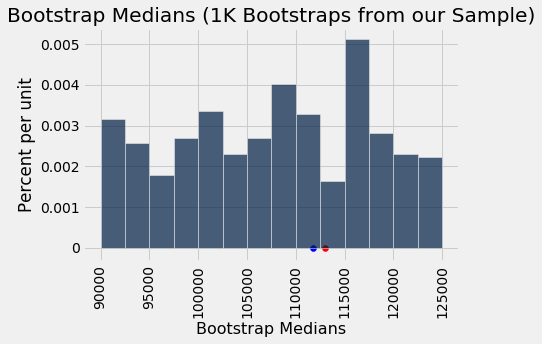

In [59]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

### 95% Confidence Interval

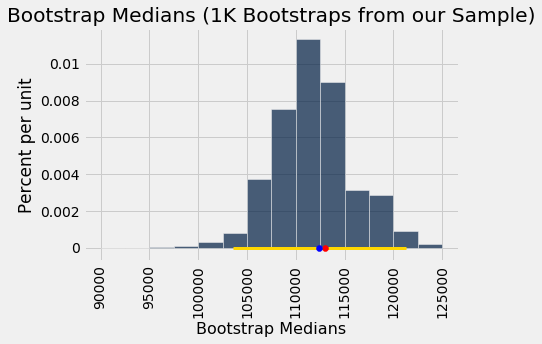

In [12]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [27]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


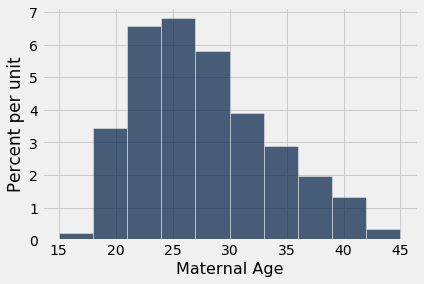

In [28]:
births.hist('Maternal Age')

In [29]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [30]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [31]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

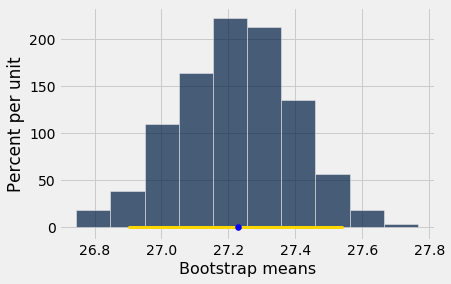

In [32]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');